<a href="https://colab.research.google.com/github/jenniferamhajduk/AIML_Playground/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch Deep Learning Workflow

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn #building blocks for torch neural networks
from pathlib import Path
torch.__version__

'2.1.0+cu121'


Data Preparation

In [20]:
#Linear Regression
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [21]:
train_split = int(.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [22]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label="training data")
  plt.scatter(test_data, test_labels, c='g', s=4, label="test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="predictions")

  plt.legend(prop={"size": 14})

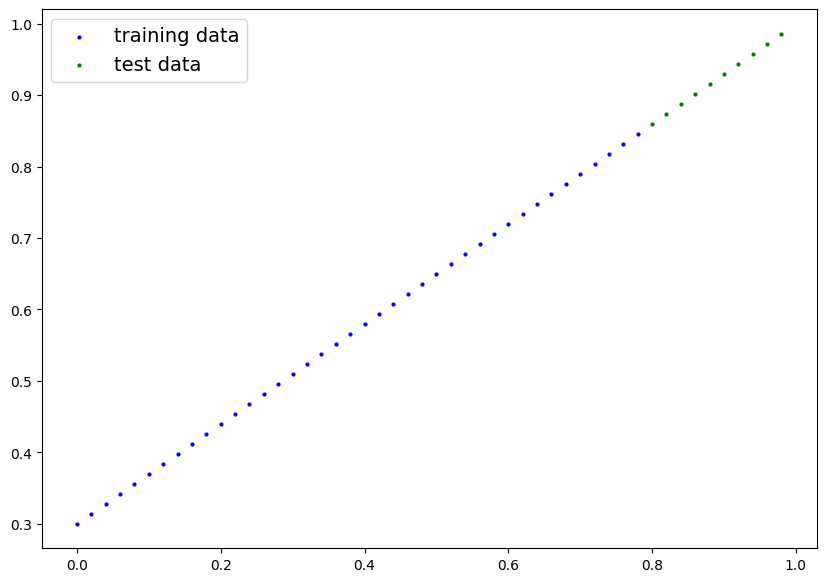

In [23]:
plot_predictions();

Build Model

In [24]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [25]:
torch.manual_seed(42)
linregmodel_1 = LinearRegressionModel()

linregmodel_1
list(linregmodel_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [26]:
linregmodel_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [27]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [28]:
with torch.inference_mode():
  y_preds = linregmodel_1(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

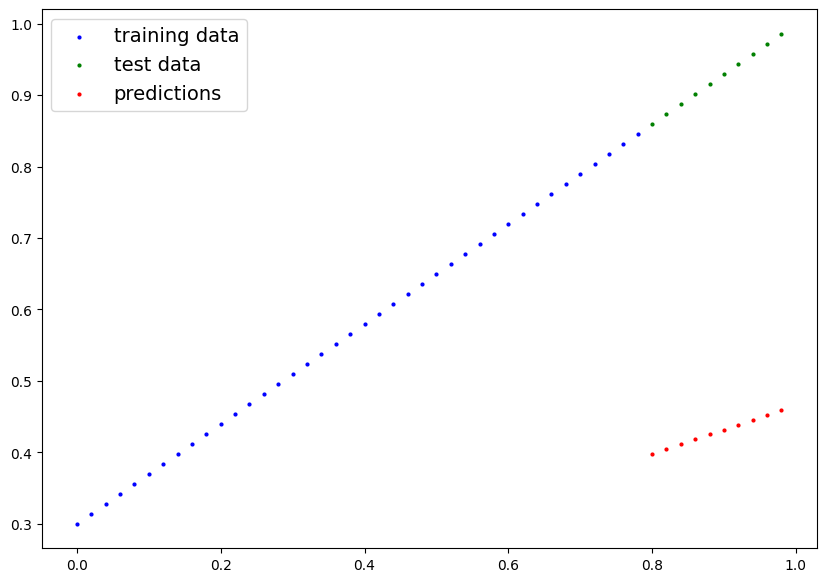

In [29]:
plot_predictions(predictions=y_preds)

Train Model

In [30]:
list(linregmodel_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [31]:
linregmodel_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [32]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "linregmodel.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(MODEL_SAVE_PATH)

models/linregmodel.pth


In [33]:
loss_fn = nn.L1Loss()
learning_rate = 0.01
optimizer = torch.optim.SGD(params=linregmodel_1.parameters(), lr=learning_rate)

In [34]:
epochs = 100
losses = []
test_losses = []
epoch_count = []

for epoch in range(epochs):
  linregmodel_1.train()
  y_pred = linregmodel_1(X_train)
  loss = loss_fn(y_pred, y_train)
  losses.append(loss)
  print("Loss: ", loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #linregmodel_1.eval()
  #print(linregmodel_1.state_dict())
  with torch.inference_mode():
    test_preds = linregmodel_1(X_test)
    test_loss = loss_fn(test_preds, X_test)
    test_losses.append(test_loss)
    print("Test Loss: ", test_loss)
    print("--------------------------")
  epoch_count.append(epoch)
torch.save(linregmodel_1.state_dict(), f=MODEL_SAVE_PATH)

Loss:  tensor(0.3129, grad_fn=<MeanBackward0>)
Test Loss:  tensor(0.4481)
--------------------------
Loss:  tensor(0.3014, grad_fn=<MeanBackward0>)
Test Loss:  tensor(0.4346)
--------------------------
Loss:  tensor(0.2898, grad_fn=<MeanBackward0>)
Test Loss:  tensor(0.4211)
--------------------------
Loss:  tensor(0.2783, grad_fn=<MeanBackward0>)
Test Loss:  tensor(0.4077)
--------------------------
Loss:  tensor(0.2668, grad_fn=<MeanBackward0>)
Test Loss:  tensor(0.3942)
--------------------------
Loss:  tensor(0.2553, grad_fn=<MeanBackward0>)
Test Loss:  tensor(0.3807)
--------------------------
Loss:  tensor(0.2438, grad_fn=<MeanBackward0>)
Test Loss:  tensor(0.3672)
--------------------------
Loss:  tensor(0.2322, grad_fn=<MeanBackward0>)
Test Loss:  tensor(0.3538)
--------------------------
Loss:  tensor(0.2207, grad_fn=<MeanBackward0>)
Test Loss:  tensor(0.3403)
--------------------------
Loss:  tensor(0.2092, grad_fn=<MeanBackward0>)
Test Loss:  tensor(0.3268)
-----------------

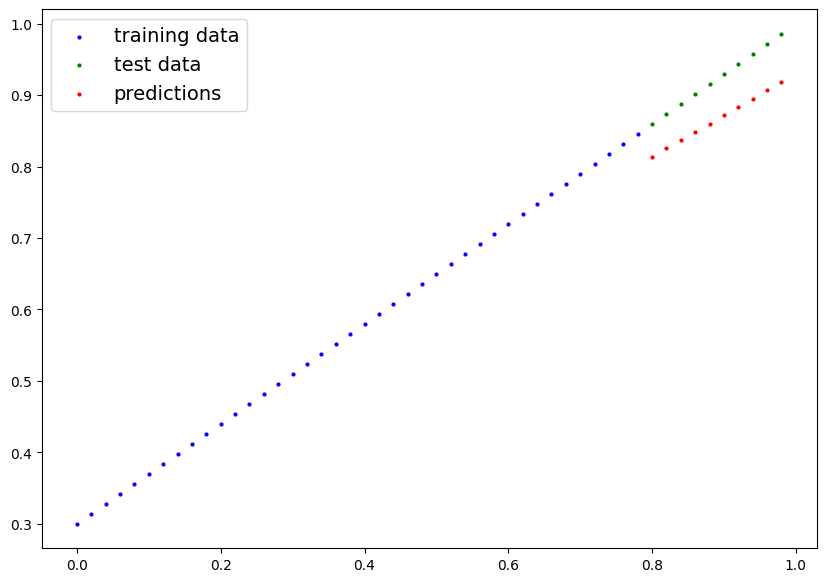

In [35]:
plot_predictions(predictions=test_preds)

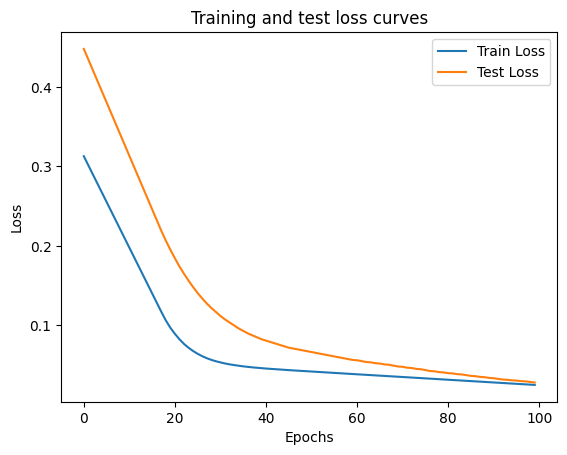

In [36]:
plt.plot(epoch_count, np.array(torch.tensor(losses).numpy()), label="Train Loss")
plt.plot(epoch_count, test_losses, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()


In [40]:
linregmodel_load.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [48]:
linregmodel_load.eval()
with torch.inference_mode():
  loaded_model_preds = linregmodel_load(X_test)

In [49]:
linregmodel_1.eval()
with torch.inference_mode():
  y_preds = linregmodel_1(X_test)

In [50]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])